In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn.svm import SVR

In [2]:
# Importing and cleaning the data
breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
final_breast_data.shape
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

In [3]:
X = breast_dataset.iloc[:,:30].values 
Y = breast_dataset.iloc[:, 30].values 

# Scaling the features
sc_X = StandardScaler() 
std_X = sc_X.fit_transform(X)

In [4]:
# Problem 1
# Feature extraction using PCA
# Scaling the features
accuracy = []
precision = []
recall = []

# Using a linear kernal
for i in range(30):
    print(i+1)
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std_X)
    principalDf = pd.DataFrame(data = principalComponents)

    # Creating the SVM model and fitting it
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size = 0.80, test_size = 0.20, random_state=0)
    model = SVC(kernel='linear', C=1E6) 
    model.fit(X_train, Y_train) 
    # Creating predictions with the test data
    Y_pred = model.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    precision.append(metrics.precision_score(Y_test, Y_pred))
    recall.append(metrics.recall_score(Y_test, Y_pred))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


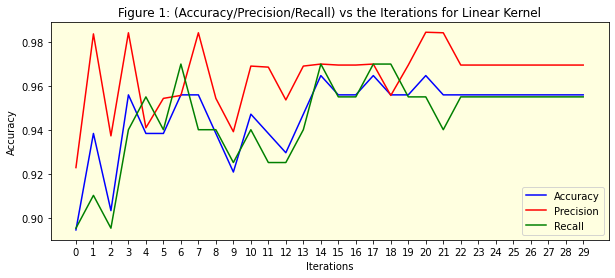

In [5]:
# Plotting the accuracy, precision, and recall against the iterations
plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.plot(range(30),accuracy, label = 'Accuracy', color = 'blue')
plt.plot(range(30),precision, label = 'Precision', color = 'red')
plt.plot(range(30),recall, label = 'Recall',  color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Figure 1: (Accuracy/Precision/Recall) vs the Iterations for Linear Kernel')
plt.xticks(range(30))
plt.legend()
plt.show()

In [6]:
# Using a poly kernal
accuracy = []
precision = []
recall = []
for i in range(30):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std_X)
    principalDf = pd.DataFrame(data = principalComponents)

    # Creating the SVM model and fitting it
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size = 0.80, test_size = 0.20, random_state=0)
    model = SVC(kernel='poly', C=1E6) 
    model.fit(X_train, Y_train) 
    # Creating predictions with the test data
    Y_pred = model.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    precision.append(metrics.precision_score(Y_test, Y_pred))
    recall.append(metrics.recall_score(Y_test, Y_pred))

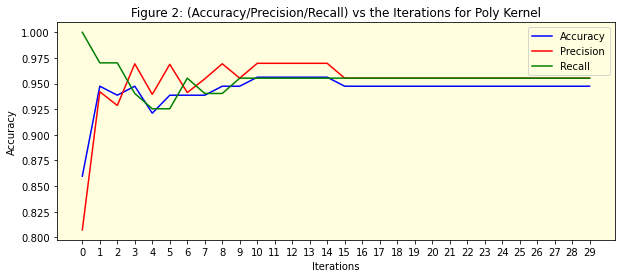

In [7]:
# Plotting the accuracy, precision, and recall against the iterations
plt.figure()
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.plot(range(30),accuracy, label = 'Accuracy', color = 'blue')
plt.plot(range(30),precision, label = 'Precision', color = 'red')
plt.plot(range(30),recall, label = 'Recall',  color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Figure 2: (Accuracy/Precision/Recall) vs the Iterations for Poly Kernel')
plt.xticks(range(30))
plt.legend()
plt.show()

In [8]:
# Using an rbf kernal
accuracy = []
precision = []
recall = []
for i in range(30):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std_X)
    principalDf = pd.DataFrame(data = principalComponents)

    # Creating the SVM model and fitting it
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size = 0.80, test_size = 0.20, random_state=0)
    model = SVC(kernel='rbf', C=1E6) 
    model.fit(X_train, Y_train) 
    # Creating predictions with the test data
    Y_pred = model.predict(X_test)

    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    precision.append(metrics.precision_score(Y_test, Y_pred))
    recall.append(metrics.recall_score(Y_test, Y_pred))

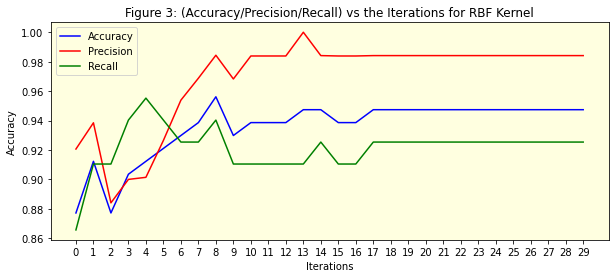

In [9]:
# Plotting the accuracy, precision, and recall against the iterations
plt.figure()
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.plot(range(30),accuracy, label = 'Accuracy', color = 'blue')
plt.plot(range(30),precision, label = 'Precision', color = 'red')
plt.plot(range(30),recall, label = 'Recall',  color = 'green')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Figure 3: (Accuracy/Precision/Recall) vs the Iterations for RBF Kernel')
plt.xticks(range(30))
plt.legend()
plt.show()

In [64]:
# Problem 2
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA 
from sklearn.svm import SVC 
from sklearn.svm import SVR
# Importing the dataset
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing = pd.DataFrame(pd.read_csv("Housing.csv", usecols = ["price","area","bedrooms","bathrooms","mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","stories","parking"]))

# Maping the yes/no inputs to 1 and 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

binarylist = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea",]
housing[binarylist] = housing[binarylist].apply(binary_map)
housing = housing.to_numpy()

Y = housing[:,0]
X = housing[:,1:]

# Scaling the features
sc_X = StandardScaler() 
std_X = sc_X.fit_transform(X)

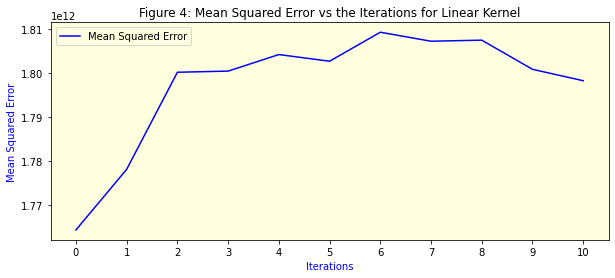

In [65]:
# Feature extraction using PCA
# Scaling the features
mean_squared_error = []

# Using a linear kernal
for i in range(11):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std_X)
    principalDf = pd.DataFrame(data = principalComponents)

    # Creating the SVM model and fitting it
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size = 0.80, test_size = 0.20, random_state=0)
    model = SVR(kernel='linear', C=1e3) 
    model.fit(X_train, Y_train) 
    # Creating predictions with the test data
    Y_lin = model.predict(X_test)

    mean_squared_error.append(metrics.mean_squared_error(Y_test, Y_lin))

# Plotting the mean squared error against the iterations
plt.rcParams['figure.figsize'] = [10, 4]
plt.figure()
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.plot(range(11), mean_squared_error, label = 'Mean Squared Error', color = 'blue')
plt.xlabel('Iterations', color = 'blue')
plt.ylabel('Mean Squared Error', color = 'blue')
plt.title('Figure 4: Mean Squared Error vs the Iterations for Linear Kernel')
plt.xticks(range(11))
plt.legend()
plt.show()

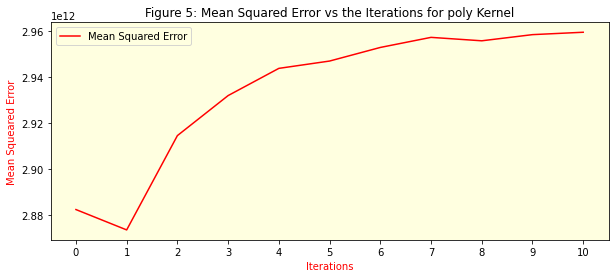

In [66]:
# Using a poly kernal
mean_squared_error = []
for i in range(11):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std_X)
    principalDf = pd.DataFrame(data = principalComponents)

    # Creating the SVM model and fitting it
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size = 0.80, test_size = 0.20, random_state=0)
    model = SVR(kernel='poly', C=1e3, degree=2) 
    model.fit(X_train, Y_train) 
    # Creating predictions with the test data
    Y_poly = model.predict(X_test)

    mean_squared_error.append(metrics.mean_squared_error(Y_test, Y_poly))

# Plotting the mean squared error against the iterations
plt.figure()
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.plot(range(11), mean_squared_error, label = 'Mean Squared Error', color = 'red')
plt.xlabel('Iterations', color = 'red')
plt.ylabel('Mean Squeared Error', color = 'red')
plt.title('Figure 5: Mean Squared Error vs the Iterations for poly Kernel')
plt.xticks(range(11))
plt.legend()
plt.show()

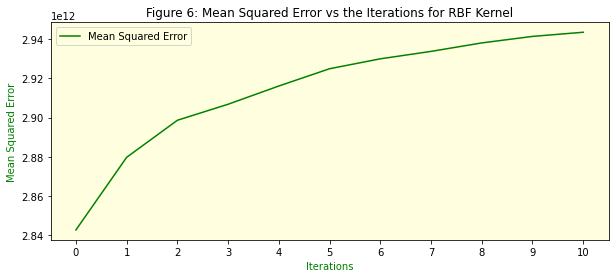

In [67]:
# Using an rbf kernal
mean_squared_error = []
for i in range(11):
    pca = PCA(n_components=i+1)
    principalComponents = pca.fit_transform(std_X)
    principalDf = pd.DataFrame(data = principalComponents)

    # Creating the SVM model and fitting it
    X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size = 0.80, test_size = 0.20, random_state=0)
    model = SVR(kernel='rbf', C=1e3, gamma=0.1) 
    model.fit(X_train, Y_train) 
    # Creating predictions with the test data
    Y_rbf = model.predict(X_test)

    mean_squared_error.append(metrics.mean_squared_error(Y_test, Y_rbf))

# Plotting the mean squared error against the iterations
plt.figure()
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.plot(range(11), mean_squared_error, label = 'Mean Squared Error', color = 'green')
plt.xlabel('Iterations', color = 'green')
plt.ylabel('Mean Squared Error', color = 'green')
plt.title('Figure 6: Mean Squared Error vs the Iterations for RBF Kernel')
plt.xticks(range(11))
plt.legend()
plt.show()

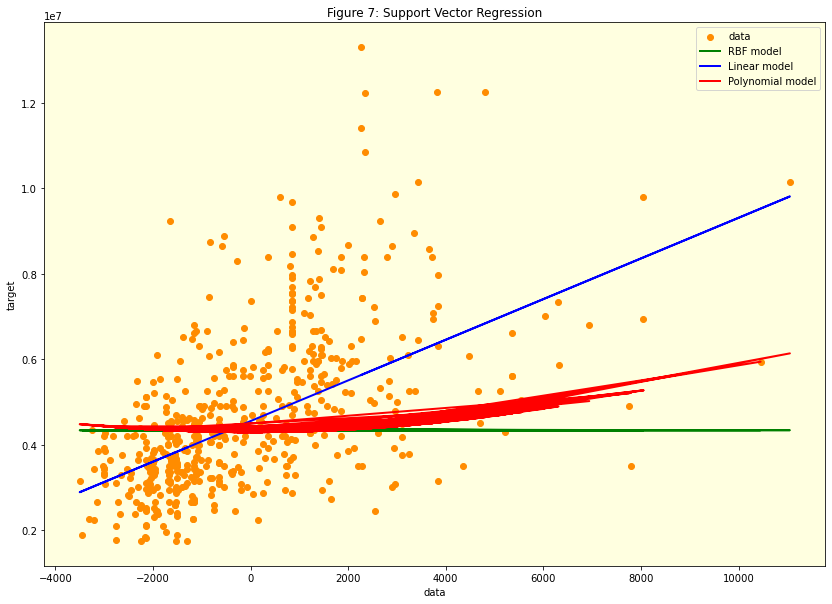

In [68]:
# Plotting the regression models for SVR
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X)
X = pd.DataFrame(data = principalComponents)
X = X.to_numpy()

# Creating the SVM model and fitting it
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, train_size = 0.80, test_size = 0.20, random_state=0)
model = SVR(kernel='linear', C=1e3) 
model.fit(X, Y) 
Y_lin = model.predict(X)

model = SVR(kernel='poly', C=1e3, degree=2)
model.fit(X, Y) 
Y_poly = model.predict(X)

model = SVR(kernel='rbf', C=1e3, gamma=0.1) 
model.fit(X, Y)
Y_rbf = model.predict(X)

lw = 2
plt.rcParams['figure.figsize'] = [14, 10]
plt.figure()
plt.rcParams.update({'axes.facecolor':'lightyellow'})
plt.scatter(X, Y, color='darkorange', label='data')
plt.plot(X, Y_rbf, color='green', lw=lw, label='RBF model')
plt.plot(X, Y_lin, color='blue', lw=lw, label='Linear model')
plt.plot(X, Y_poly, color='red', lw=lw, label='Polynomial model') 
plt.xlabel('data')
plt.ylabel('target')
plt.title('Figure 7: Support Vector Regression')
plt.legend()
plt.show()